In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
src = "/content/drive/MyDrive/Microarray /22 DNA Microarray"

In [ ]:
!mkdir data
!mkdir features

In [ ]:
from pathlib import Path
import shutil
import os
 
# defining source and destination
# paths
trg = 'data'
 
files=os.listdir(src)
 
# iterating over all the files in
# the source directory
for fname in files:
     
    # copying the files to the
    # destination directory
    shutil.copy2(os.path.join(src,fname), trg)

Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
filenames = ['alon', 'borovecki', 'burczynski', 'chiaretti', 'chin', 'chowdary', 'christensen', 'golub', 'gordon', 'gravier', 'khan', 'nakayama', 'pomeroy', 'shipp', 'singh', 'sorlie', 'su', 'subramanian', 'sun', 'tian', 'west', 'yeoh']

In [ ]:
name = filenames[1]

In [ ]:
features = pd.read_csv('data/' + name + '_inputs.csv', header=None)
labels = pd.read_csv('data/' + name + '_outputs.csv', header=None)

In [ ]:
print(labels)
#print(features)

In [ ]:


#FEATURES null replace to 0
features.fillna(0, inplace=True)

features = np.asarray(features.values)

#transpose :2d array to 1d array/1D ARRAY TO 2D ARRAY, ravel= flatten
labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))

print(labels)

min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(features)

print(features)

pca = PCA(n_components =5)
features = pca.fit_transform(features)

Main

In [ ]:
import time

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import LinearSVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [ ]:
scores = []
#one test data, rest of the train data.its cross validation.loop will continue equal number of sample
loo = LeaveOneOut()

startTime = time.time()

for train_index, test_index in loo.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    X_train = x_train[:,]
    X_test = x_test[:, ]
    Y_train = y_train[:]
    Y_test = y_test[:]

#convert into float
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    Y_train = Y_train[:]
    Y_test = Y_test[:]

    clf = lgb.LGBMClassifier()

    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_pred, Y_test)

    scores.append(score)

endTime = time.time()

In [ ]:
print('Score: ' + str(np.average(scores)))
print('Time: ' + str(endTime - startTime))

Score: 0.5483870967741935
Time: 0.1349785327911377


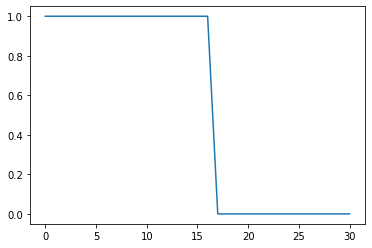

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.show(scores)

In [ ]:
from xgboost import XGBClassifier
scores1 = []

loo = LeaveOneOut()

startTime = time.time()

for train_index, test_index in loo.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    X_train = x_train[:,]
    X_test = x_test[:,]
    Y_train = y_train[:]
    Y_test = y_test[:]

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    Y_train = Y_train[:]
    Y_test = Y_test[:]

    # clf = XGBClassifier(max_depth=2, gamma=2, eta=0.8, reg_alpha=0.5, reg_lambda=0.5)
    clf = XGBClassifier()

    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_pred, Y_test)

    scores1.append(score)

endTime = time.time()

In [ ]:
print('Score: ' + str(np.average(scores1)))
print('Time: ' + str(endTime - startTime))

Score: 0.8064516129032258
Time: 0.3588602542877197


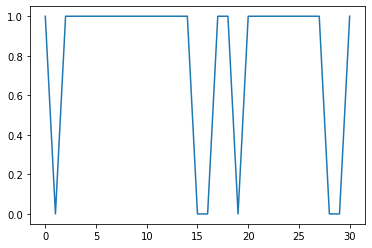

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores1)
plt.show(scores1)